<a href="https://colab.research.google.com/github/jessicabellas/Dataset-Titanic/blob/master/Titanic_Grupo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

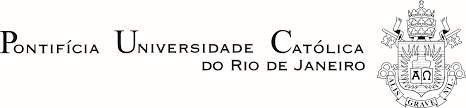 
# Especialização em Ciência de Dados - PUC-Rio

---


# Machine Learning - Prof. Tatiana Escovedo
# Grupo 6: Jessica Bellas, Louise de Paula, Lucas de Oliveira e Rômulo Loretti.

## Trabalho de Classificação utilizando Machine Learning

![texto alternativo](https://miro.medium.com/max/1050/1*ePbfZdw6sz397xLWlFZLCQ.jpeg)

# **História do Titanic**

###O naufrágio do Titanic é um dos naufrágios mais infames da história.

###Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

# **1. Definição do Problema**

Para este experimento, vamos utilizar o dataset "TITANIC: Machine Learning from Disaster" do site Kaggle. 

Esse problema nos leva a vários questionamentos, como por exemplo, "que tipo de pessoas têm mais probabilidade de sobreviver?". Existem pesquisas que informam que muitas pessoas sobreviveram através do embarque em botes salva-vidas por serem de classe social alta. Nosso desafio é descobrir padrões entre os sobreviventes a partir de questionamentos. Será se classe mais alta teve mais chance de sobrevivência que a de classe mais baixa? Qual foi a proporção de homens e mulheres que sobreviveram a tragédia? E as crianças conseguiram sobreviver? Enfim, inúmeros questionamentos que utilizaremos para tratar os dados e recolher o máximo de informações.

Nosso objetivo será predizer se um passageiro com determinadas características/atributos seria morto ou sobreviveria ao acidente. 

Esse dataset é composto por 12 atributos e 1309 linhas.

No Kaggle o dataset já estava dividido em treino e teste, mas consolidamos os 2 datasets em um dataset único. 

### Atributos:
* **PassengerId**: Identificador do passageiro
* **Pclass**: Tipo de acomodação (1 = primeira, 2 = segunda, 3 = terceira)
* **Name**: Nome
* **Sex**: Sexo
* **Age**: Idade em anos
* **SibSp**: Nº de irmãos/cônjugues embarcado
* **Parch**: Nº de pais/filhos embarcado
* **Ticket**: Número do cartão de embarque
* **Fare**: Tarifa
* **Cabin**: Número da cabine
* **Embarked**: Local de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)
* **Survived**: Sobrevivente (0 = Não, 1 = Sim)



Começaremos com as importações dos pacotes que iremos utilizar.

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore") 


# Importação de pacotes

import pandas as pd
import numpy as np
import re as re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from sklearn import svm
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier



#**2. Carga de Dados** 

###Iremos usar o pacote Pandas ( Python Data Analysis Library) para carregar de um arquivo .csv.

###Após o dataset ser carregado, iremos explorá-lo.

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3.0,Mr. Owen HarrisBraund,male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S,0.0
1,2,1.0,Mrs. John Bradley (Florence Briggs Thayer)Cum...,female,38.0,1.0,0.0,PC 17599,712833.00,C85,C,1.0
2,3,3.0,Miss. LainaHeikkinen,female,26.0,0.0,0.0,STON/O2. 3101282,7925.00,NaN,S,1.0
3,4,1.0,Mrs. Jacques Heath (Lily May Peel)Futrelle,female,35.0,1.0,0.0,113803,53.10,C123,S,1.0
4,5,3.0,Mr. William HenryAllen,male,35.0,0.0,0.0,373450,8.05,NaN,S,0.0


# **3. Análise Exploratória dos Dados**
### O objetivo dessa fase é conhecer melhor os dados disponíveis no dataset.  

###3.1 Estatísticas Descritivas:

In [ ]:
# Mostra as dimensões do dataset
titanic.shape

(1309, 12)

In [ ]:
# Mostra as informações do dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
titanic.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


Iremos excluir de início algumas colunas que não serão necessárias para o nosso estudo de caso.

In [3]:
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])

Decidimos também renomear algumas colunas e transformar os tipos de alguns dados com o intuito de obter uma melhor associação dos resultados.

In [4]:
titanic = titanic.rename(index=str, columns={'Pclass':'Class_ticket', 'SibSp':'Brothers_spouses'
                                              , 'Parch':'Parents_children'})

In [5]:
titanic['Sex'] = titanic['Sex'].replace('male', 0)
titanic['Sex'] = titanic['Sex'].replace('female',1)

Embarked: Local de embarque (1 = Cherbourg, 2 = Queenstown, 3 = Southampton)

In [6]:
titanic['Embarked'] = titanic['Embarked'].replace('C', 1)
titanic['Embarked'] = titanic['Embarked'].replace('Q', 2)
titanic['Embarked'] = titanic['Embarked'].replace('S', 3)

In [7]:
# Verifica o tipo de dataset de cada atributo
titanic.dtypes

Class_ticket        float64
Sex                 float64
Age                 float64
Brothers_spouses    float64
Parents_children    float64
Fare                float64
Embarked            float64
Survived            float64
dtype: object

Tipos dos dados e nomes alterados, vamos seguir explorando nossos dados.

In [8]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
titanic.describe()

,Class_ticket,Sex,Age,Brothers_spouses,Parents_children,Fare,Embarked,Survived
count,1234.000000,1234.000000,997.000000,1234.000000,1234.000000,1.233000e+03,1232.000000,1234.000000
mean,2.284441,0.340357,30.152457,0.504052,0.378444,1.353710e+05,2.503247,0.358185
std,0.842486,0.474021,14.435305,1.041117,0.868605,4.225239e+05,0.813167,0.479661
min,1.000000,0.000000,0.330000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,1.450000e+01,2.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,7.920000e+01,3.000000,0.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,7.895800e+04,3.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,5.123292e+06,3.000000,1.000000


Informações Gerais e Estatístcas Descritivas: dimensões do dataset e  suas informações 

Vamos agora verificar se o dataset tem as classes balanceadas.

Lembrando que:

              0 - Não sobreviveu.
              1 - Sobreviveu.

In [10]:
# Verifica a distribuição do objeto de estudo 
titanic.groupby('Survived').size()

Survived
0.0    792
1.0    442
dtype: int64

Verificando a **simetria** (skew) da distribuição de dataset de cada atributo, assumindo que a distribuição é normal.

In [ ]:
# Simetria de cada atributo
titanic.skew()


Class_ticket       -0.598647
Sex                 0.602189
Age                 0.407675
Brothers_spouses    3.844220
Parents_children    3.669078
Fare                4.367709
Embarked           -1.125593
Survived            0.506478
dtype: float64


    - Maior que 0: a distribuição é assimétrica positiva (maior à esquerda e menor à direita).
    - Menor que 0: a distribuição é assimétrica negativa (maior à direita e menor à esquerda).
    - Igual a 0: a distribuição é simétrica.


###3.2. Visualizações Unimodais:

In [ ]:
# Visualizações unimodais
# Garantindo o estilo padrão do Matplotlib
IPython_default = plt.rcParams.copy()
plt.rcParams.update(IPython_default);

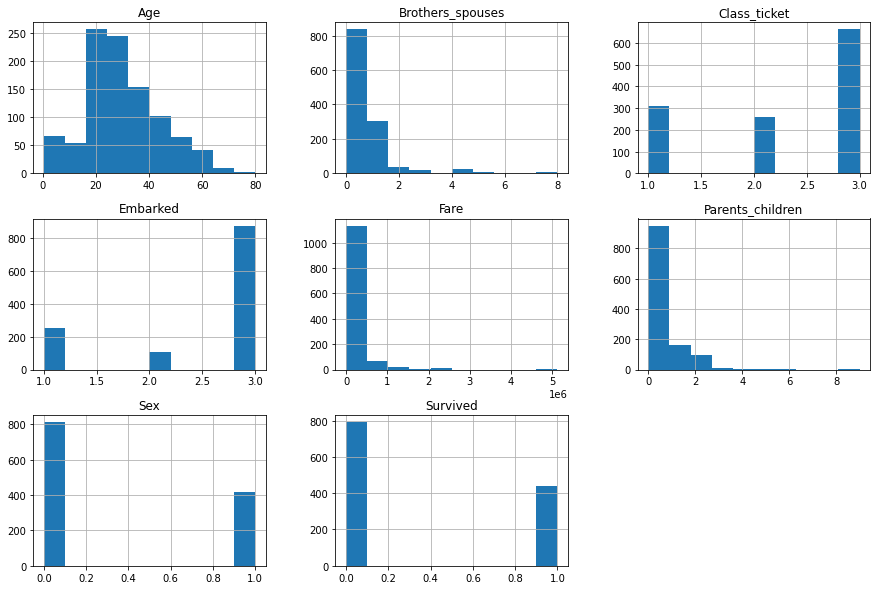

In [ ]:
# Histograma
titanic.hist(figsize = (15,10))
plt.show()

Analisando os gráficos podemos dizer que Brothers_spouses, Fare e Parents_children seguem uma distribuição exponencial, e a coluna Age segue uma distribuição aproximadamente normal.

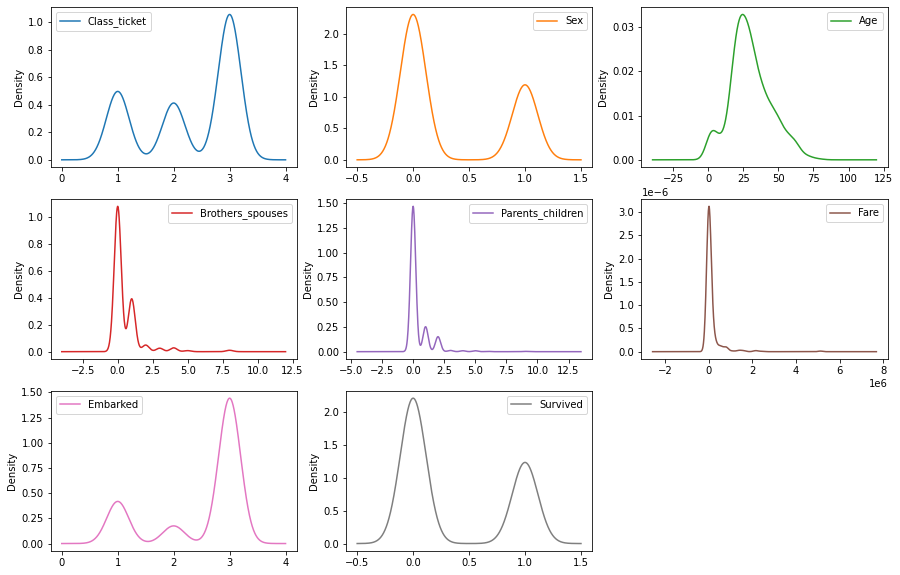

In [ ]:
# Density Plot
titanic.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

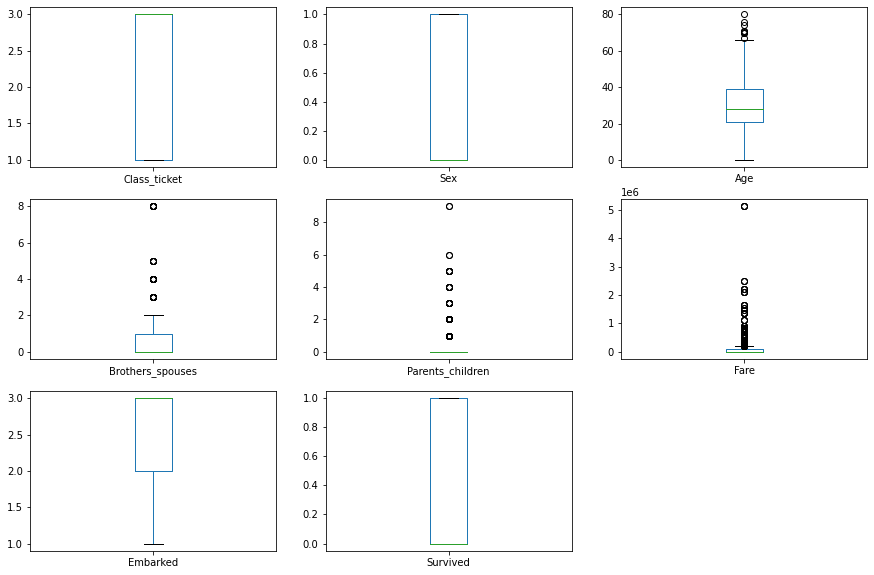

In [ ]:
# Boxplot
titanic.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Através boxplot podemos a ter uma ideia da dispersão dos dataset e os possíveis outliers. Como por este exemplos as colunas Age, Brothers_spouses, Parentes_children e Fare.

###3.3. Visualizações Multimodais:

Utilizando o método de Person vamos verificar a **covariância** entre as variáveis numéricas do dataset. 

In [ ]:
titanic.corr(method = 'pearson')

,Class_ticket,Sex,Age,Brothers_spouses,Parents_children,Fare,Embarked,Survived
Class_ticket,1.000000,-0.151227,-0.400829,0.060174,0.009050,-0.314189,0.202218,-0.290454
Sex,-0.151227,1.000000,-0.049293,0.108954,0.212841,0.122516,-0.089335,0.694006
Age,-0.400829,-0.049293,1.000000,-0.250895,-0.137207,0.137806,-0.087471,-0.040201
Brothers_spouses,0.060174,0.108954,-0.250895,1.000000,0.370940,-0.013601,0.066148,0.013332
Parents_children,0.009050,0.212841,-0.137207,0.370940,1.000000,0.038737,0.041358,0.112374
Fare,-0.314189,0.122516,0.137806,-0.013601,0.038737,1.000000,-0.251450,0.187098
Embarked,0.202218,-0.089335,-0.087471,0.066148,0.041358,-0.251450,1.000000,-0.121768
Survived,-0.290454,0.694006,-0.040201,0.013332,0.112374,0.187098,-0.121768,1.000000


    - Próximo de -1 : há uma correlação negativa entre as variáveis,
    - Próximo de +1: há uma correlação positiva entre as variáveis.
    - 0: não há correlação entre as variáveis.

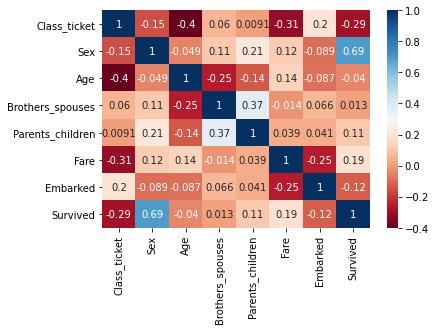

In [ ]:
# Visualizações multimodais
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(titanic.corr(), annot=True, cmap='RdBu');

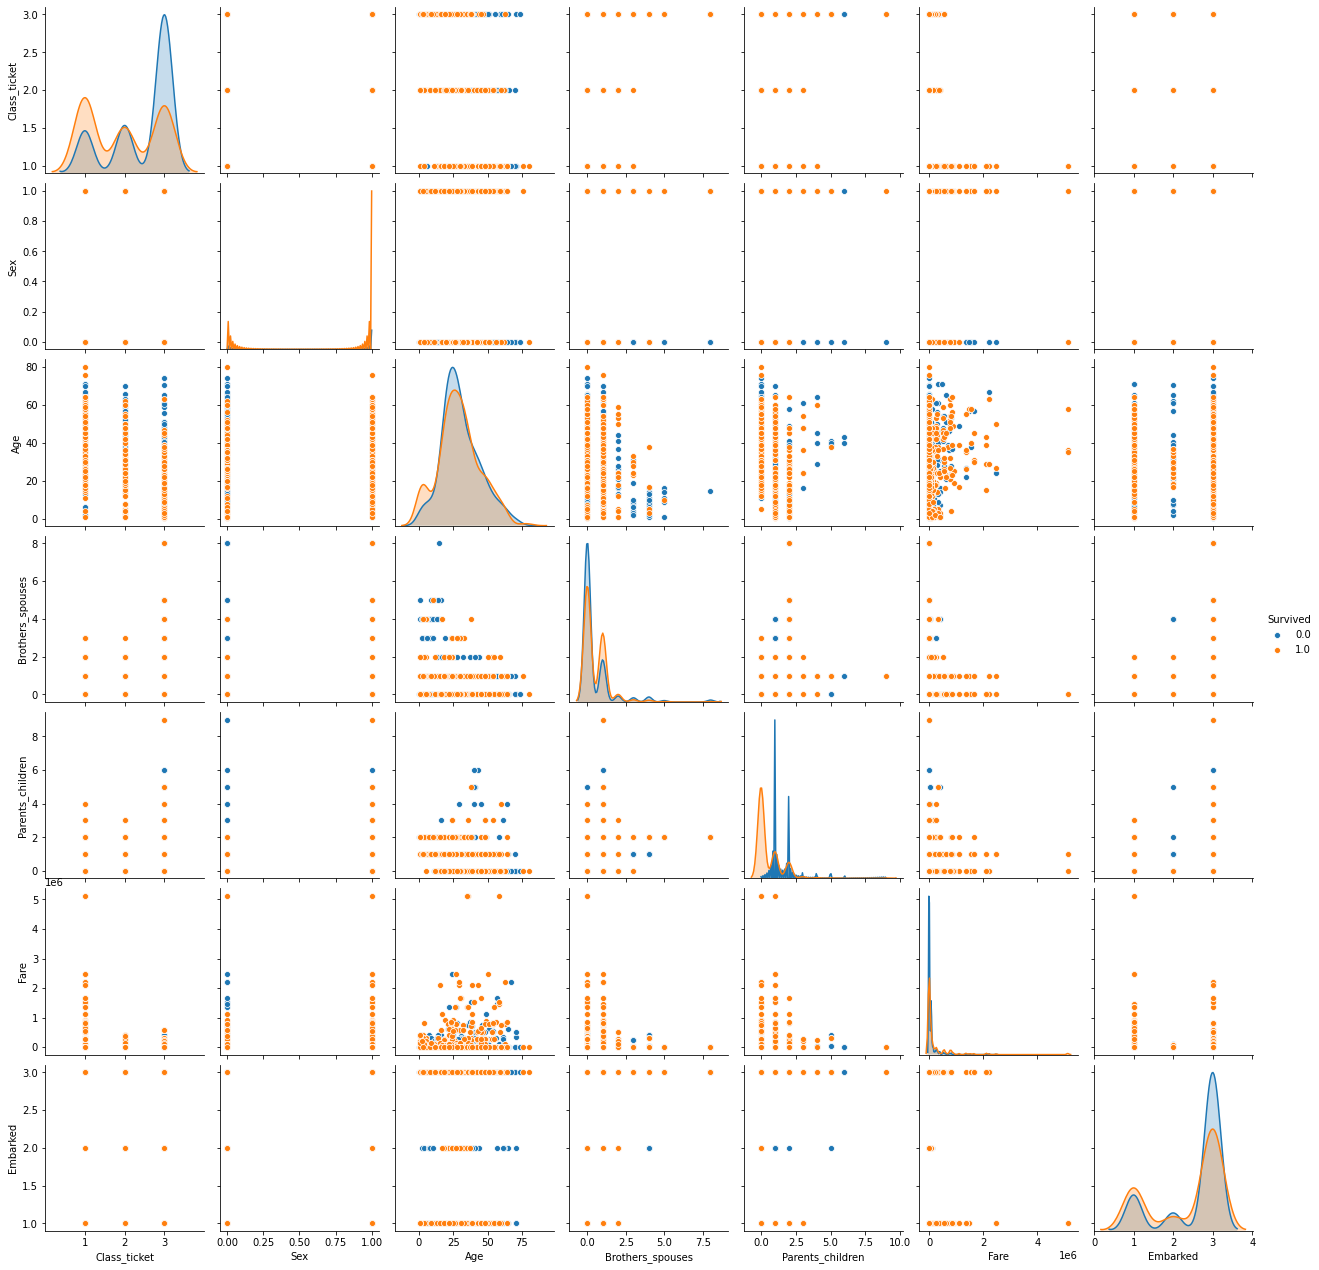

In [ ]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(titanic, hue = "Survived", height = 2.5);

###3.4 Comparando os Atibutos com a nossa classe Survived

In [11]:
titanic['Class_ticket'].value_counts()

3.0    663
1.0    312
2.0    259
Name: Class_ticket, dtype: int64

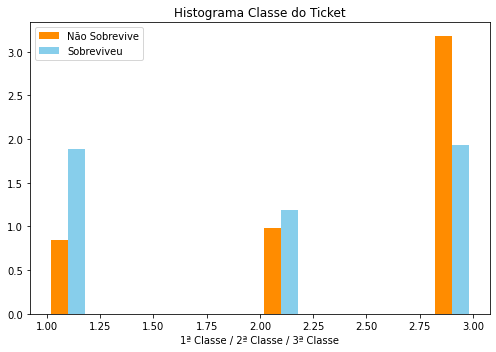

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), squeeze=False)

colors = [ 'darkorange', 'skyblue']
labels = ['Não Sobrevive', 'Sobreviveu']

plt.hist([titanic[titanic.Survived == False]['Class_ticket'], 
          titanic[titanic.Survived == True]['Class_ticket']], 
          density=True, label=labels, color=colors)

plt.title('Histograma Classe do Ticket') 
plt.xlabel('1ª Classe / 2ª Classe / 3ª Classe');
plt.legend() 
plt.tight_layout() 
plt.show()

Analisando a classe do ticket com o número de sobreviventes podemos dizer que o número de pessoas com a classe 3 era o dobro que da classe 1 e 2. Classe 1 e 2 tivemos mais sobreviventes, e classe 3 o número maior é o de não sobrevivente.

In [12]:
titanic['Sex'].value_counts()

0.0    814
1.0    420
Name: Sex, dtype: int64

In [13]:
titanic[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
0.0,0.119165
1.0,0.821429


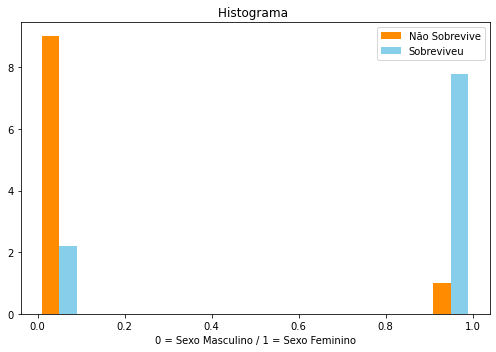

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), squeeze=False)

colors = [ 'darkorange', 'skyblue']
labels = ['Não Sobrevive', 'Sobreviveu']

plt.hist([titanic[titanic.Survived == False]['Sex'], 
          titanic[titanic.Survived == True]['Sex']], 
          density=True, label=labels, color=colors)

plt.hist([titanic[titanic.Survived == False]['Sex'], 
          titanic[titanic.Survived == True]['Sex']], 
          density=True, color=colors)


plt.title('Histograma ') 
plt.xlabel('0 = Sexo Masculino / 1 = Sexo Feminino');
plt.legend() 
plt.tight_layout() 
plt.show()

Interessante perceber que o número de homens embarcados é quase o dobro de mulheres mas a taxa de sobrevivência das mulheres é muito superior a dos homens.

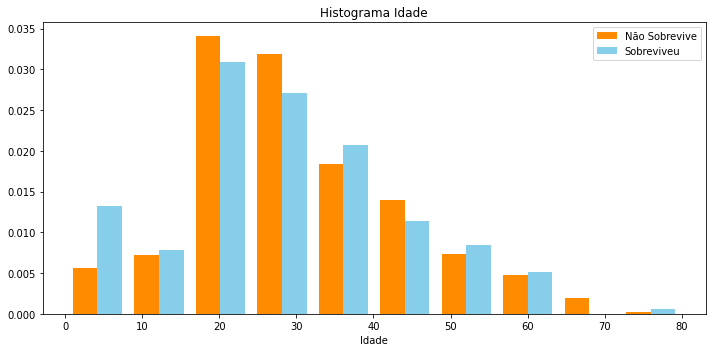

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'darkorange', 'skyblue']
labels = ['Não Sobrevive', 'Sobreviveu']

plt.hist([titanic[titanic.Survived == False]['Age'], 
          titanic[titanic.Survived == True]['Age']], 
          density=True, label=labels, color=colors)

plt.title('Histograma Idade') 
plt.xlabel('Idade')
plt.legend() 
plt.tight_layout() 
plt.show()

Analisando o gráfico podemos ver que crianças abaixo de 10 anos tiveram uma alta porcentagem de sobreviventes e idosos acima de 60 anos tiveram um baixo número de sobreviventes.

In [14]:
titanic[['Brothers_spouses', 'Survived']].groupby(['Brothers_spouses']).mean()

,Survived
Brothers_spouses,
0.0,0.312201
1.0,0.503289
2.0,0.447368
3.0,0.250000
4.0,0.181818
5.0,0.166667
8.0,0.125000


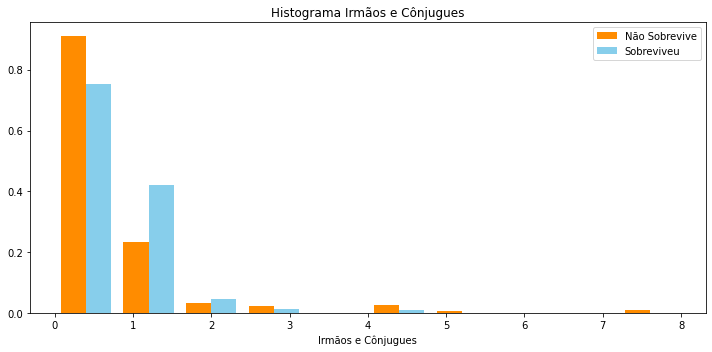

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'darkorange', 'skyblue']
labels = ['Não Sobrevive', 'Sobreviveu']

plt.hist([titanic[titanic.Survived == False]['Brothers_spouses'], 
          titanic[titanic.Survived == True]['Brothers_spouses']], 
          density=True, label=labels, color=colors)

plt.title('Histograma Irmãos e Cônjugues') 
plt.xlabel('Irmãos e Cônjugues');
plt.legend() 
plt.tight_layout() 
plt.show()

Por esse gráfico percebemos quem possuía um irmão ou cônjugue abordo tiveram uma porcentagem maior de sobreviventes que não sobreviventes.

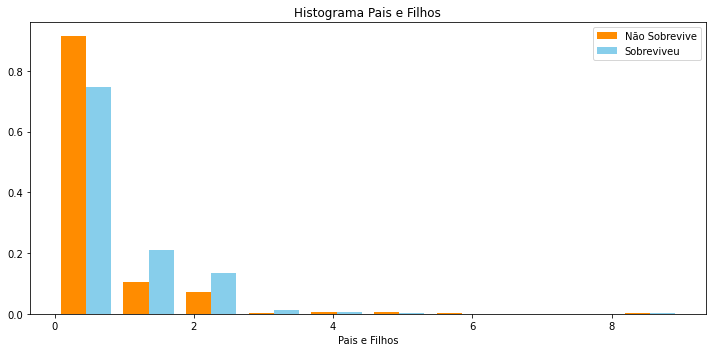

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'darkorange', 'skyblue']
labels = ['Não Sobrevive', 'Sobreviveu']

plt.hist([titanic[titanic.Survived == False]['Parents_children'], 
          titanic[titanic.Survived == True]['Parents_children']], 
          density=True, label=labels, color=colors)

plt.title('Histograma Pais e Filhos') 
plt.xlabel('Pais e Filhos');
plt.legend() 
plt.tight_layout() 
plt.show()

Neste gráfico podemos dizer que quem possuía familiares(pais e filhos) abordo tiveram uma porcentagem maior de sobreviventes que não sobreviventes.

In [16]:
titanic[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
1.0,0.470356
2.0,0.367925
3.0,0.323024


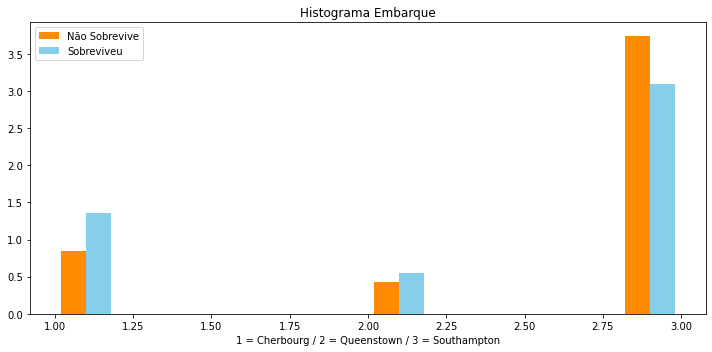

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'darkorange', 'skyblue']
labels = ['Não Sobrevive', 'Sobreviveu']

plt.hist([titanic['Embarked'][titanic.Survived == False], 
          titanic['Embarked'][titanic.Survived == True]], 
          density=True, label=labels, color=colors)

plt.title('Histograma Embarque') 
plt.xlabel('1 = Cherbourg / 2 = Queenstown / 3 = Southampton');
plt.legend() 
plt.tight_layout() 
plt.show()

Analisando esse gráfico vimos que grande parte dos tripulantes embarcaram pelo Embarque 3 na cidade de Southampton.

# **4.** **Pré-processamento de Dados**
Nesse momento realizaremos ajustes no dataset.

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import Normalizer # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

In [ ]:
# a) Limpeza de Dados
# Tratamento de Missings
# verificando nulls no dataset
titanic.isnull().sum().sort_values(ascending=False)

Age                 263
Embarked              2
Fare                  1
Survived              0
Parents_children      0
Brothers_spouses      0
Sex                   0
Class_ticket          0
dtype: int64

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(titanic.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = titanic[col[0:-1]]

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Decidimos colocar a média de cada atributo nos seus respectivos valores faltantes(NaN).

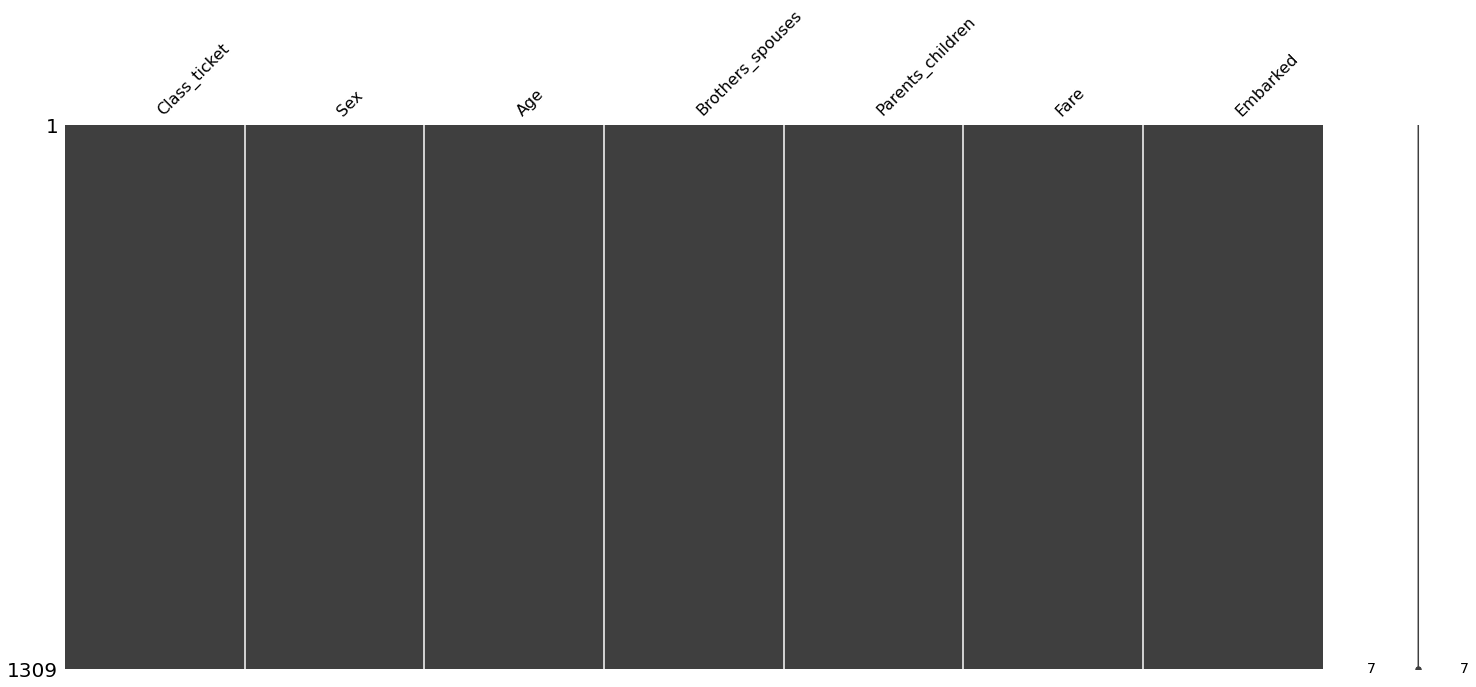

In [ ]:
# substituindo os NaN de 'Age', 'Fare'e 'mass' pela mediana da coluna
atributos['Age'].fillna(atributos['Age'].median(), inplace=True)
atributos['Fare'].fillna(atributos['Fare'].median(), inplace=True)
atributos['Embarked'].fillna(atributos['Embarked'].max(), inplace=True)

# substituindo os NaN de 'Embarked' por 3 = S, maior numeros de embarques
#atributos['Embarked'].fillna('3', inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Agora iremos criar nosso novo dataset com os dados tratados para uso na criação do modelo.

In [ ]:
# Guardando o novo dataset para testes futuros
dftitanic = atributos

# incluindo a coluna 'class' no novo dataset
dftitanic['Survived'] = titanic['Survived']

# exibindo as primeiras linhas
dftitanic.head(10)

,Class_ticket,Sex,Age,Brothers_spouses,Parents_children,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,3.0,0
1,1,1,38.0,1,0,71.2833,1.0,1
2,3,1,26.0,0,0,7.9250,3.0,1
3,1,1,35.0,1,0,53.1000,3.0,1
4,3,0,35.0,0,0,8.0500,3.0,0
5,3,0,28.0,0,0,8.4583,2.0,0
6,1,0,54.0,0,0,51.8625,3.0,0
7,3,0,2.0,3,1,21.0750,3.0,0
8,3,1,27.0,0,2,11.1333,3.0,1
9,2,1,14.0,1,0,30.0708,1.0,1


Gerando um csv com meu dataset tratado.

In [ ]:
dftitanic.to_csv('./dftitanic.csv', index=False)

In [ ]:
# verificando novamente nulls no dataset
dftitanic.isnull().sum()

Class_ticket        0
Sex                 0
Age                 0
Brothers_spouses    0
Parents_children    0
Fare                0
Embarked            0
Survived            0
dtype: int64

###4.1 Nesta etapa iremos dividir o dataset em base de treino e base de teste.

In [ ]:
# Separação em conjuntos de treino e teste
array = dftitanic.values
X = array[:,0:7]
Y = array[:,7]

test_size = 0.20
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# **5. Modelos de Classificação**

### 5.1. Criação e avaliação de modelos: linha base

In [ ]:
# scoring = 'roc_auc'
# Parâmetros
num_folds = 10
scoring = 'accuracy'

In [ ]:
# Criação dos modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

Agora vamos comparar os resultados modelos criados, treinando-os com os dados do conjunto de treino e utilizando a técnica de validação cruzada. Para cada um dos modelos criados, executaremos a validação cruzada e, em seguida, exibiremos a acurácia média e o desvio padrão de cada um.

In [ ]:
np.random.seed(7) # definindo uma semente global

# Avaliação dos modelos
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.856786 (0.044522)
KNN: 0.703956 (0.040770)
CART: 0.812784 (0.033221)
NB: 0.843388 (0.042774)
SVM: 0.705806 (0.037862)


Estes resultados sugerem que tanto a Regressão Logística quanto o Naive Bayes têm potencial de serem bons modelos, porém, temos também o CART(Árvore de Decisão) com uma acurácia bem próxima. Vamos olhar o gráfico e analisar melhor.

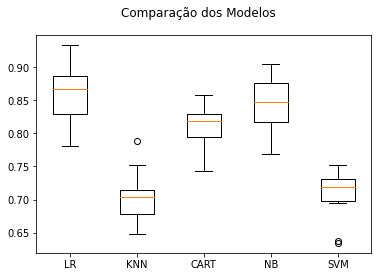

In [ ]:
# Comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

Bem de acordo com os números de acurácia, percebemos que o KNN e o SVM não tiveram um bom desempenho. Pelo gráfico poderiamos dizer que o NB possui uma distribuição melhor comparado com os outros modelos.

###5.2. Criação e Avaliação de Modelos: Dados Padronizados

Iremos padronizar os dados utilizando uma cópia do dataset. O foco será reduzir os dados brutos que possam impactar negativamente a habilidade de alguns modelos.

Evitando o "vazamento de dados" na transformação, usaremos o pipelines.


In [ ]:
np.random.seed(7) # definindo uma semente global

# Padronização do dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.855833 (0.044403)
ScaledKNN: 0.842436 (0.036800)
ScaledCART: 0.809908 (0.031953)
ScaledNB: 0.843388 (0.042774)
ScaledSVM: 0.867280 (0.042121)


Resultados sem padronização:

  - LR: 0.856786 (0.044522)
  - KNN: 0.703956 (0.040770)
  - CART: 0.812784 (0.033221)
  - NB: 0.843388 (0.042774)
  - SVM: 0.705806 (0.037862)

Analisando os resultados, vemos que o KNN e o SVM tiveram uma acurácia muito maior que antes da padronização. Já o LR, CART e NB não ocorreram muitas modificações nos resultados.

Vamos analisar graficamente.

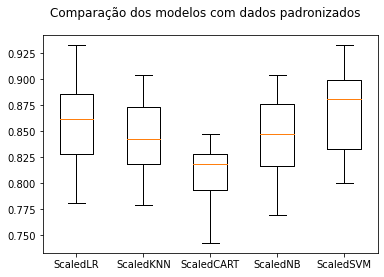

In [ ]:
# Comparação dos modelos com dados padronizados
fig = plt.figure()
fig.suptitle('Comparação dos modelos com dados padronizados') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

Esta gráfico demonstrou melhores representações do modelos do que o gráfico sem os dados padronizados. 

###5.3 Criação e Avaliação de Modelos: Normalizados

In [ ]:
np.random.seed(7) # definindo uma semente global

# Normalização do dataset
pipelines = []
pipelines.append(('ScaledMinMaxLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledMinMaxKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledMinMaxCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledMinMaxNB', Pipeline([('Scaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledMinMaxSVM', Pipeline([('Scaler', MinMaxScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledMinMaxLR: 0.856795 (0.043496)
ScaledMinMaxKNN: 0.850073 (0.038485)
ScaledMinMaxCART: 0.813736 (0.029491)
ScaledMinMaxNB: 0.843388 (0.042774)
ScaledMinMaxSVM: 0.853938 (0.043691)


Resultados linha base:

  - LR: 0.856786 (0.044522)
  - KNN: 0.703956 (0.040770)
  - CART: 0.812784 (0.033221)
  - NB: 0.843388 (0.042774)
  - SVM: 0.705806 (0.037862)
---
Resultados dados padronizados:

   - ScaledLR: 0.855833 (0.044403)
   - ScaledKNN: 0.842436 (0.036800)
   - ScaledCART: 0.809908 (0.031953)
   - ScaledNB: 0.843388 (0.042774)
   - ScaledSVM: 0.867280 (0.042121)
---
Resultados dados normalizados:

   - ScaledMinMaxLR: 0.856795 (0.043496)
   - ScaledMinMaxKNN: 0.850073 (0.038485)
   - ScaledMinMaxCART: 0.813736 (0.029491)
   - ScaledMinMaxNB: 0.843388 (0.042774)
   - ScaledMinMaxSVM: 0.853938 (0.043691)




Vericando os resultados na linha base, diríamos que o KNN e SVM não seriam um bom modelo porém após as transformações ambos se equipararam aos nossos melhores resultados. Com os valores bem próximos, seguiremos então ajustando todos os modelos exceto o CART que não apresentou um bom resultado comparado aos demais.

###5.4. Ajuste dos Modelos

Iremos começar com o KNN que apresentou um bom resultado após a normalização e padronização.

In [ ]:
np.random.seed(7) # definindo uma semente global

# Tuning do KNN

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

k = [1,3,5,7,9,11,13,15,17,19,21]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric=distancias)

model = KNeighborsClassifier()

kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.869185 usando {'metric': 'euclidean', 'n_neighbors': 13}
0.783168 (0.041497): {'metric': 'euclidean', 'n_neighbors': 1}
0.840522 (0.037825): {'metric': 'euclidean', 'n_neighbors': 3}
0.843388 (0.036302): {'metric': 'euclidean', 'n_neighbors': 5}
0.849148 (0.041729): {'metric': 'euclidean', 'n_neighbors': 7}
0.859643 (0.042459): {'metric': 'euclidean', 'n_neighbors': 9}
0.866328 (0.045193): {'metric': 'euclidean', 'n_neighbors': 11}
0.869185 (0.041851): {'metric': 'euclidean', 'n_neighbors': 13}
0.865357 (0.046297): {'metric': 'euclidean', 'n_neighbors': 15}
0.859634 (0.046012): {'metric': 'euclidean', 'n_neighbors': 17}
0.859643 (0.045604): {'metric': 'euclidean', 'n_neighbors': 19}
0.856777 (0.048333): {'metric': 'euclidean', 'n_neighbors': 21}
0.786035 (0.037584): {'metric': 'manhattan', 'n_neighbors': 1}
0.847198 (0.034820): {'metric': 'manhattan', 'n_neighbors': 3}
0.846282 (0.039221): {'metric': 'manhattan', 'n_neighbors': 5}
0.858690 (0.044938): {'metric': 'manhattan', 

Tentamos com com dados padronizados e normalizados, o melhor resultado foi o padronizado com acurácia 0.869185 usando {'metric': 'euclidean', 'n_neighbors': 13}.

Agora vamos testar o SVM pelos mesmo critérios do KNN.

In [ ]:
np.random.seed(7) # definindo uma semente global

# Tuning do SVM

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC(gamma='auto')

kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.867271 usando {'C': 0.9, 'kernel': 'rbf'}
0.853938 (0.043691): {'C': 0.1, 'kernel': 'linear'}
0.774634 (0.033166): {'C': 0.1, 'kernel': 'poly'}
0.861548 (0.041010): {'C': 0.1, 'kernel': 'rbf'}
0.829093 (0.041583): {'C': 0.1, 'kernel': 'sigmoid'}
0.853938 (0.043691): {'C': 0.3, 'kernel': 'linear'}
0.859615 (0.042164): {'C': 0.3, 'kernel': 'poly'}
0.864396 (0.038185): {'C': 0.3, 'kernel': 'rbf'}
0.757454 (0.041670): {'C': 0.3, 'kernel': 'sigmoid'}
0.853938 (0.043691): {'C': 0.5, 'kernel': 'linear'}
0.861548 (0.040552): {'C': 0.5, 'kernel': 'poly'}
0.863443 (0.041251): {'C': 0.5, 'kernel': 'rbf'}
0.745998 (0.038700): {'C': 0.5, 'kernel': 'sigmoid'}
0.853938 (0.043691): {'C': 0.7, 'kernel': 'linear'}
0.860577 (0.042995): {'C': 0.7, 'kernel': 'poly'}
0.867262 (0.044129): {'C': 0.7, 'kernel': 'rbf'}
0.747912 (0.041631): {'C': 0.7, 'kernel': 'sigmoid'}
0.853938 (0.043691): {'C': 0.9, 'kernel': 'linear'}
0.860586 (0.041431): {'C': 0.9, 'kernel': 'poly'}
0.867271 (0.043240): {'C': 0.9

Tentamos com com dados padronizados e normalizados, o melhor resultado foi o padronizado com acurácia 0.867271 usando {'C': 0.9, 'kernel': 'rbf'}.

# **6. Métodos Ensembles**

Avaliaremos quatro modelos diferentes, sendo dois métodos de Boosting e dois de Bagging:

* Métodos de Boosting: AdaBoost (AB) e Gradient Boosting (GBM).
* Métodos de Bagging: Random Forests (RF) e Extra Trees (ET).

In [ ]:
np.random.seed(7) # definindo uma semente global

# Ensembles

ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier(n_estimators=10))) 
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10))) 
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.855833 (0.040692)
GBM: 0.864386 (0.044232)
RF: 0.826181 (0.039426)
ET: 0.822326 (0.040407)


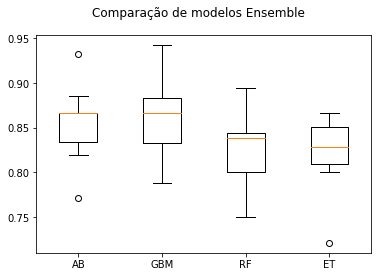

In [ ]:
# Comparação de modelos
fig = plt.figure()
fig.suptitle('Comparação de modelos Ensemble') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

In [ ]:
np.random.seed(7) # definindo uma semente global

# Padronização do dataset
pipelines = []
pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())]))) 
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(n_estimators=10))])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=10))])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: 0.855833 (0.040692)
ScaledGBM: 0.863425 (0.042602)
ScaledRF: 0.829048 (0.036927)
ScaledET: 0.822326 (0.040407)


In [ ]:

np.random.seed(7) # definindo uma semente global

# Normalização do dataset
pipelines = []
pipelines.append(('MinMaxScaledAB', Pipeline([('Scaler', MinMaxScaler()),('AB', AdaBoostClassifier())]))) 
pipelines.append(('MinMaxScaledGBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingClassifier())])))
pipelines.append(('MinMaxScaledRF', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestClassifier(n_estimators=10))])))
pipelines.append(('MinMaxScaledET', Pipeline([('Scaler', MinMaxScaler()),('ET', ExtraTreesClassifier(n_estimators=10))])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

MinMaxScaledAB: 0.855833 (0.040692)
MinMaxScaledGBM: 0.864386 (0.044232)
MinMaxScaledRF: 0.828086 (0.038800)
MinMaxScaledET: 0.822326 (0.040407)


# **7.** **Finalização do Modelo**

Verificamos que o KNeighborsClassifier(KNN) com os dados normalizados e com os seguintes parâmrtros {'metric': 'euclidean', 'n_neighbors': 13} mostrou a melhor acurácia para o problema 0.869185. 
Iremos então treinar este modelo e em seguida fazer as predições com a base de teste.

In [ ]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsClassifier(metric='euclidean', n_neighbors=13)
model.fit(rescaledX, Y_train)



# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8625954198473282
[[146  14]
 [ 22  80]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       160
         1.0       0.85      0.78      0.82       102

    accuracy                           0.86       262
   macro avg       0.86      0.85      0.85       262
weighted avg       0.86      0.86      0.86       262



Através do conjunto teste, verificamos uma acurácia de 86,22% em dados não vistos. Um pouco pior que no nosso dataset treino, mas já esperado, obtivemos uma diferença de apenas 0,0066.


Agora iremos treiná-lo com todo o dataset.

In [ ]:
# Preparação do modelo o dataset completo

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model = KNeighborsClassifier(metric='euclidean', n_neighbors=13)
model.fit(rescaledX, Y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

# **8.** **Aplicando o Modelo em Dados Não Vistos**

Iremos incluir 5 novas instâncias sem saber a classe de saída. Em seguida aplicaremos no nosso modelo treinado para estimar as classes.

In [ ]:
dftitanic.columns

Index(['Class_ticket', 'Sex', 'Age', 'Brothers_spouses', 'Parents_children',
       'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [ ]:
data = { 'Class_ticket': [1,2,3,1,2], 
              'Sex':[0,1,0,1,0], 
              'Age':[19, 35, 60, 23, 3], 
              'Brothers_spouses':[0,0,1,1,1], 
              'Parents_children':[0,1,0,0,1],
              'Fare':[7.9250,8.0500,51.8625, 53.1000,8.4583], 
              'Embarked': [1,3,3,2,1], 
            }

atributos = ['Class_ticket', 'Sex', 'Age', 'Brothers_spouses', 'Parents_children','Fare', 'Embarked']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:7].astype(float)
print(X_entrada)

[[ 1.      0.     19.      0.      0.      7.925   1.    ]
 [ 2.      1.     35.      0.      1.      8.05    3.    ]
 [ 3.      0.     60.      1.      0.     51.8625  3.    ]
 [ 1.      1.     23.      1.      0.     53.1     2.    ]
 [ 2.      0.      3.      1.      1.      8.4583  1.    ]]


In [ ]:
# Padronização nos dados de entrada
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-1.54609786 -0.74349692 -0.81418086 -0.47908676 -0.4449995  -0.49024046
  -1.83492621]
 [-0.35209072  1.34499549  0.42609939 -0.47908676  0.71076309 -0.48782368
   0.62227932]
 [ 0.84191642 -0.74349692  2.36403729  0.48128777 -0.4449995   0.35925739
   0.62227932]
 [-1.54609786  1.34499549 -0.50411079  0.48128777 -0.4449995   0.3831835
  -0.60632344]
 [-0.35209072 -0.74349692 -2.05446111  0.48128777  0.71076309 -0.47992951
  -1.83492621]]


In [ ]:
# Estimativa de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 1. 0. 1. 0.]


# **8.** **Análise de Atributos**

In [ ]:
# Imports
import pandas as pd
import numpy as np
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
dftitanic.head()

,Class_ticket,Sex,Age,Brothers_spouses,Parents_children,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,3.0,0
1,1,1,38.0,1,0,71.2833,1.0,1
2,3,1,26.0,0,0,7.9250,3.0,1
3,1,1,35.0,1,0,53.1000,3.0,1
4,3,0,35.0,0,0,8.0500,3.0,0


In [ ]:
dftitanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Class_ticket      1309 non-null   int64  
 1   Sex               1309 non-null   int64  
 2   Age               1309 non-null   float64
 3   Brothers_spouses  1309 non-null   int64  
 4   Parents_children  1309 non-null   int64  
 5   Fare              1309 non-null   float64
 6   Embarked          1309 non-null   float64
 7   Survived          1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 132.0+ KB


In [ ]:
# separando os atributos e a classe do dataset
array = dftitanic.values
X = array[:,0:7]
Y = array[:,7]

# definindo o tamanho do conjunto de teste
test_size = 0.20 

# A semente (seed) pode ser qualquer número, e garante que os resultados possam ser reproduzidos de forma idêntica toda vez que o script for rodado. 
# Isto é muito importante quando trabalhamos com modelos ou métodos que utilizam de algum tipo de aleatoriedade.
seed = 7

# particionando em conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
# definindo a métrica de avaliação dos algoritmos
scoring = 'accuracy'
# scoring = 'roc_auc'

kfold = KFold(n_splits=10)

Seleção Univariada

In [ ]:
# Função para seleção de atributos
best_var = SelectKBest(score_func=chi2, k=4)

# Executa a função de pontuação em (X_train, Y_train) e obtém os atributos selecionados
fit = best_var.fit(X_train, Y_train)

# Reduz X para os atributos selecionados
features = fit.transform(X_train)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dftitanic.columns[0:7])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas): Fare, Sex, Embarked e Pclass.
# (Basta mapear manualmente o índice dos nomes dos respectivos atributos)
set_printoptions() # 3 casas decimais
print(fit.scores_)


Número original de atributos: 7

Número reduzido de atributos: 4

Atributos Originais: Index(['Class_ticket', 'Sex', 'Age', 'Brothers_spouses', 'Parents_children',
       'Fare', 'Embarked'],
      dtype='object')
[2.096e+01 3.167e+02 6.878e+00 1.358e+00 2.674e+01 4.702e+03 5.998e+00]


Eliminação Recursiva de Atributos

In [ ]:
# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Variáveis
rfe = RFE(modelo, 4)
fit = rfe.fit(X_train, Y_train)

# Print dos resultados
print("Atributos preditores:", dftitanic.columns[0:7])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados" 
# e com valor 1 em "Ranking dos Atributos")
# (Basta mapear manualmente o índice dos nomes dos respectivos atributos)
print("\nAtributos selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)

Atributos preditores: Index(['Class_ticket', 'Sex', 'Age', 'Brothers_spouses', 'Parents_children',
       'Fare', 'Embarked'],
      dtype='object')

Atributos selecionados: [ True  True False  True False False  True]

Ranking de atributos: [1 1 3 1 2 4 1]

Qtd de melhores Atributos: 4


#**9.** **Conclusão**



* Este estudo foi realizado no dataset do Titanic oriundo do site Kaggle.

* Na análise exploratória foi realizada uma verificação de cada atributo com relação à classe Sobrevivente podendo assim ter vários insights do mesmo.

* O Pre-processamento foi bastante trabalhoso, sendo necessário realizar diversos ajustes na base, como deleção de atributos, ajustes de categorização, tratamento de dados faltantes, entre outros.

* Na etapa de avaliação dos modelos com os dados em sua forma base, os modelos de Regressão Logística e Naive Bayes obtiveram os melhores resultados.

* Em seguida com os dados padronizados, os modelos de Regressão Logística e SVM obtiveram os melhores resultados. E normalizados, os resultados foram próximos porém um pouco mais altos que os modelos anteriores, estes foram os modelos de Regressão Logística, KNN e SVM.

* Seguimos aplicando diversos modelos para esse problema de classificação, tivemos como destaque o Modelo KNN (apliacado o Tunning) com os dados padronizados com os seguintes parâmetros: {'metric': 'euclidean', 'n_neighbors': 13}, este obteve a melhor acurácia para o problema 0.869185.

* Aplicando os dados de teste neste modelo atingimos 0.86259 de acurária, a medida escolhida para avaliação do modelo.

* Utilizamos também os modelos Ensemble que tiveram acurácia bem próxima dos valores que os modelos menos sofisticados apresentaram, mas ainda sim o modelo KNN seguiu com o melhor resultado.

